<a href="https://colab.research.google.com/github/ritika1000/Machine_learning_projects/blob/main/Anemia_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/anaemia-prediction-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/anaemia-prediction-dataset/file_.csv
/kaggle/anaemia-prediction-dataset/d_output.csv
/kaggle/anaemia-prediction-dataset/expanded_output.csv


In [2]:
#Reading the csv file using Pandas
df = pd.read_csv('/kaggle/anaemia-prediction-dataset/d_output.csv')

In [3]:
df.head() #Getting a glimpse of the dataset

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes


In [4]:
# Viewing the Structure of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [5]:
# Checking for null values in dataset
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [6]:
#Checking for duplicate values
df.duplicated().sum()

0

In [7]:
#Checking for duplicate id/number
if df['Number'].nunique()==len(df):
    print("There are no duplicate Serial Numbers.")
else:
    print("Duplicate serial no's exist.")

There are no duplicate Serial Numbers.


Exploratory Data Analysis📊

In [8]:
#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

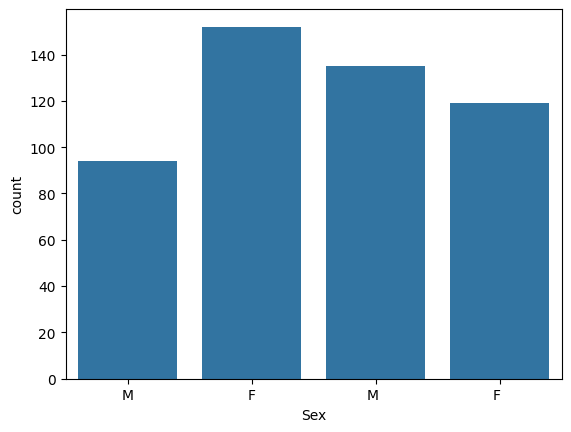

In [9]:
sns.countplot(x='Sex', data=df)

OOPS! It appears that we have an issue in 'Sex' column of our dataset. Some 'M' and 'F' values have trailing spaces. We need to remove them.

In [10]:
df['Sex'] = df['Sex'].str.strip()

<Axes: xlabel='Sex', ylabel='count'>

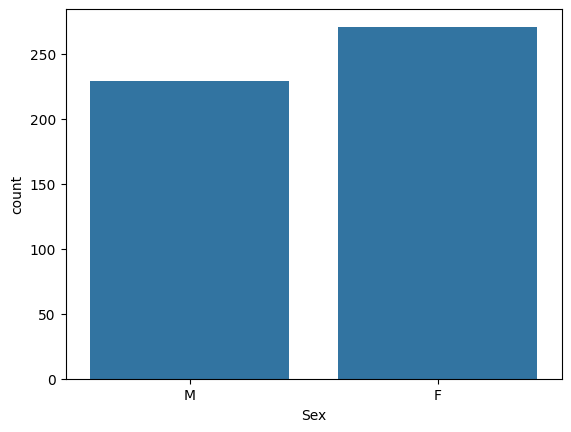

In [11]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Anaemic', ylabel='count'>

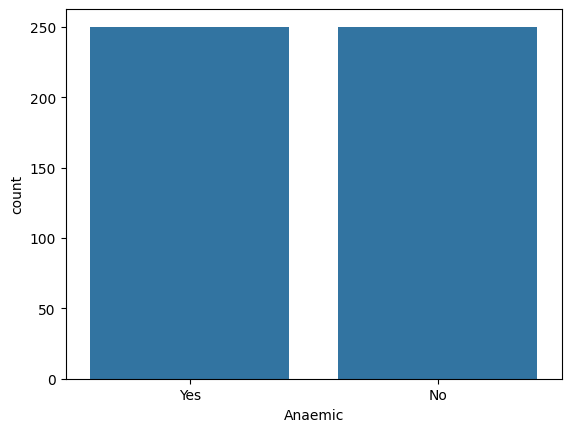

In [12]:
#Plotting frequency of Anaemic column
sns.countplot(x='Anaemic', data=df)

Distribution of Numeric Columns

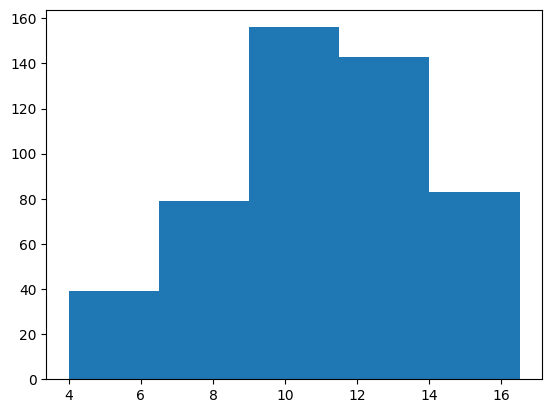

In [13]:
plt.hist(df['Hb'], bins=5)
plt.show()

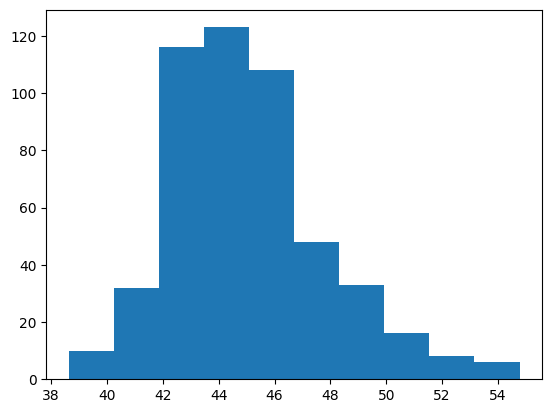

In [14]:
#Plotting distribution of pixel columns
plt.hist(df['%Red Pixel'], bins=10)
plt.show()

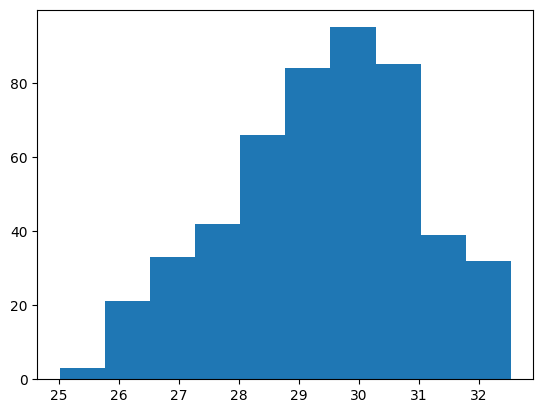

In [15]:
#Plotting distribution of pixel columns
plt.hist(df['%Green pixel'], bins=10)
plt.show()

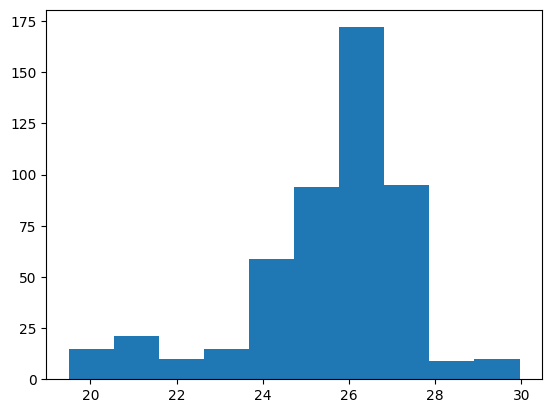

In [16]:
#Plotting distribution of pixel columns
plt.hist(df['%Blue pixel'], bins=10)
plt.show()

Encoding categorical data to numeric

In [18]:
from sklearn.preprocessing import LabelEncoder #importing Label Encoder

In [19]:
le = LabelEncoder() #Creating a Label Encoder object

In [20]:
df['Sex'] =  le.fit_transform(df['Sex'])
#1=Male(M)
#2=Female(F)

In [21]:
df['Anaemic'] = le.fit_transform(df['Anaemic'])
#1=YES
#0=NO

In [22]:
df.head() # glimpse of transformed columns

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.170845,30.945626,25.921971,6.252659,1
1,2,0,43.163481,30.306974,26.759843,8.578865,1
2,3,0,46.269997,27.315656,26.028556,9.640936,1
3,4,0,45.054787,30.469816,24.460797,4.794217,1
4,5,1,45.061884,31.218572,24.071714,8.865329,1


Plotting a 'heatmap' to show correlation between differnt variables of the dataset.

<Axes: >

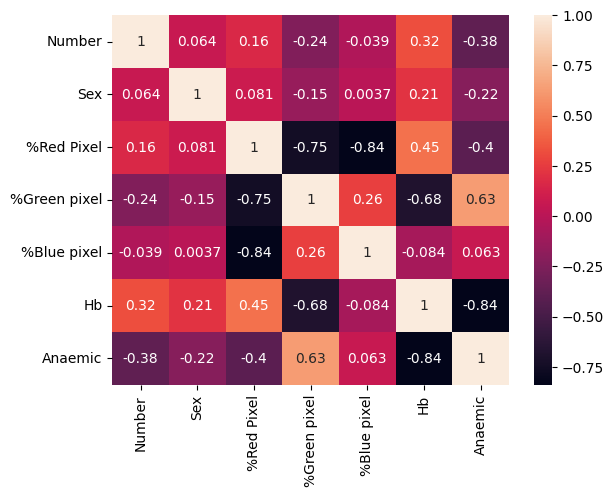

In [23]:
sns.heatmap(df.corr(), annot = True)

Splitting data into 'Training' and 'Testing'

In [24]:
x = df.drop(['Number','Anaemic'], axis=1)

In [25]:
y = df['Anaemic']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

Training Model 1 - Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_model = LogisticRegression()

In [30]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
log_prediction = logistic_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
accuracy_score(y_test, log_prediction)

0.9878787878787879

This model was able to predict 98.7 % of values accurately.

Training Model 2 - RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest_model = RandomForestClassifier()


In [37]:
forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
forest_pred=forest_model.predict(X_test)

In [39]:
accuracy_score(y_test, forest_pred)

1.0

Hurray! The RandomForestClassifier model achieved 100% accuracy in detecting Anaemia.